# 다중클래스 분류

* 분류 클래스가 2개보다 많을 때 다중클래스 분류라고 한다.
* outcome 클래스에 순서가 존재하지 않는다.
* 이진분류기를 이용해 다중클래스 분류를 할 수 있고, 한번에 다중클래스 분류를 할 수도 있다.

In [1]:
# 필요한 라이브러리 불러오기!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mglearn

mpl.rc('font',family='MalGun Gothic')
mpl.rc('axes',unicode_minus = False)

In [ ]:
'''
다중분류에서 이진class와 다중class의 차이

이진class : 하나의 클래스와 나머지 클래스를 분류한다. ---> SVM, logistic, 퍼셉트론
다중 class : 각각의 클래스를 분류한다. ---> 나이브 베이즈, knn, 결정트리, logistic
'''

In [ ]:
# multiclass 매개변수 알아보기!!

# multiclass 매개변수에는 auto ovr multinomial이 존재한다.
# ovr -> 하나의 클래스를 1 나머지 클래스를 0으로 두어서 이진분류의 문제로 만들어 다중분류를 실시한다.
# auto -> data가 이진이거나 solver = 'liblinear'이면 ovr를 사용하고 나머지는 multinomial을 사용한다.
# multonomial -> 다중분류 실시

* make_bolbs의 데이터를 사용해 다중분류 해보기

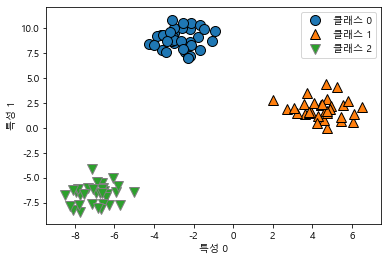

In [3]:
from sklearn.datasets import make_blobs

# 데이터 생성 및 시각화 하기
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [24]:
# 로지스틱 회귀모델에 auto , multinomial , ovr를 각각 대입하여 결과 확인해보기
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습
logistic = LogisticRegression(multi_class='auto',solver='lbfgs').fit(X,y)  # 매개변수를 auto로 지정
print('계수 배열의 크기 :',logistic.coef_.shape)
print('절편 배열의 크기 :',logistic.intercept_.shape)

######################

# 계수와 절편 배열의 크기를 통해 데이터를 분류하는 회귀직선이 3개가 생긴것을 확인할 수 있다.

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


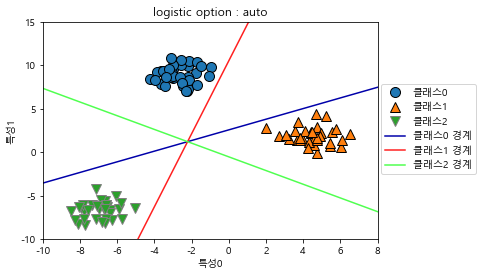

In [25]:
# auto 일때 시각화 하기  ---> 여기서 auto는 multinomial을 사용하였다.

mglearn.discrete_scatter(X[:,0],X[:,1],y) # 산점도 그림 그리기
line = np.linspace(-15,15) # 회귀직선을 그리는데 필요한 x축 점들 생성

# for문을 사용해 3개의 회귀직선을 그래프 위에 그린다.
for coef, intercept, color in zip(logistic.coef_,logistic.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept)/coef[1],c=color) # 회귀식을 이용해 회귀 직선 그리기
    
# 그래프 옵션 지정
plt.title('logistic option : auto') # 제목 지정
plt.ylim(-10,15) # 범위 지정
plt.xlim(-10,8) 
plt.xlabel('특성0') # 축 이름 지정
plt.ylabel('특성1')
plt.legend(['클래스0','클래스1','클래스2','클래스0 경계','클래스1 경계','클래스2 경계'],loc=(1.01,0.3)) # 범례 표시


######################

# option을 auto로 지정하긴 했지만, 이 모델에서 실제 수행된 것은 multinomial이 수행되었다.
# 각 점들을 잘 분류해주고 있는 것을 확인할 수 있다.

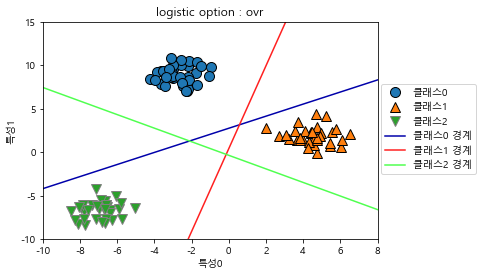

In [26]:
# 로지스틱 모델에 ovr를 이용해 결과 확인해보기

logistic1 = LogisticRegression(multi_class='ovr',solver = 'liblinear').fit(X,y)  # 매개변수를 ovr로 지정

# 시각화 하기  --> 바로 위의 코드 참조
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 산점도 그림 그리기
line = np.linspace(-15,15) # 회귀직선을 그리는데 필요한 x축 점들 생성

# for문을 사용해 3개의 회귀직선을 그래프 위에 그린다.
for coef, intercept, color in zip(logistic1.coef_,logistic1.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept)/coef[1],c=color) # 회귀식을 이용해 회귀 직선 그리기
    
# 그래프 옵션 지정
plt.title('logistic option : ovr') # 제목 지정
plt.ylim(-10,15) # 범위 지정
plt.xlim(-10,8) 
plt.xlabel('특성0') # 축 이름 지정
plt.ylabel('특성1')
plt.legend(['클래스0','클래스1','클래스2','클래스0 경계','클래스1 경계','클래스2 경계'],loc=(1.01,0.3)) # 범례 표시

##############################

# option을 ovr로 설정했기 때문에 이진분류를 여러번 실행하여 다중분류를 실시한다.
# 분류가 잘 되긴 했지만 각 집단을 분류해주는 직선이 multonomial옵션을 주었을 때와는 차이가 나는 것을 확인할 수 있다.

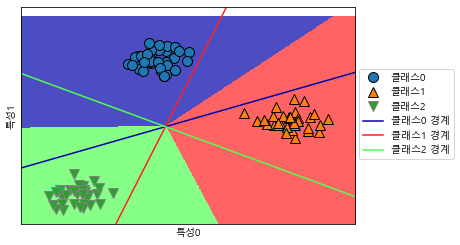

In [27]:
# 앞에서 그린 그래프에 색깔 입히기
mglearn.plots.plot_2d_classification(logistic,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 산점도 그림 그리기
line = np.linspace(-15,15) # 회귀직선을 그리는데 필요한 x축 점들 생성

# multinomial 옵션
for coef, intercept, color in zip(logistic.coef_,logistic.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept)/coef[1],c=color) # 회귀식을 이용해 회귀 직선 그리기
    
# 그래프 옵션 지정
plt.ylim(-10,15) # 범위 지정
plt.xlim(-10,8) 
plt.xlabel('특성0') # 축 이름 지정
plt.ylabel('특성1')
plt.legend(['클래스0','클래스1','클래스2','클래스0 경계','클래스1 경계','클래스2 경계'],loc=(1.01,0.3)) # 범례 표시

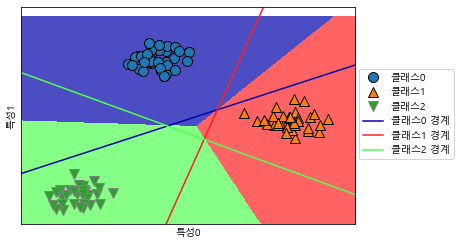

In [23]:
# 앞에서 그린 그래프에 색깔 입히기
mglearn.plots.plot_2d_classification(logistic1,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 산점도 그림 그리기
line = np.linspace(-15,15) # 회귀직선을 그리는데 필요한 x축 점들 생성

# ovr 옵션
for coef, intercept, color in zip(logistic1.coef_,logistic1.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0] + intercept)/coef[1],c=color) # 회귀식을 이용해 회귀 직선 그리기
    
# 그래프 옵션 지정
plt.ylim(-10,15) # 범위 지정
plt.xlim(-10,8) 
plt.xlabel('특성0') # 축 이름 지정
plt.ylabel('특성1')
plt.legend(['클래스0','클래스1','클래스2','클래스0 경계','클래스1 경계','클래스2 경계'],loc=(1.01,0.3)) # 범례 표시

# 오차 행렬
* confusion_matrix 함수를 이용해 오차 행렬을 구할 수 있다.
* 분류 문제에서 주로 사용하며 정확도만 가지고 모델의 성능을 파악하기 어렵기 때문에 오차 행렬도 같이 본다.
* 오차 행렬을 기반으로 정밀도, 재현율 , f1 score등을 구할 수 있다.

* iris 데이터를 이용해 로지스틱 모델을 이용하고 오차행렬 출력하기

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# iris 데이터 불러오기
iris = load_iris()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state= 0,test_size = 0.4)

# 모델 생성 및 학습시키기
logistic_multinomial = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)
logistic_ovr = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train,y_train)

# 예측하기
pred_multinomial = logistic_multinomial.predict(X_test)
pred_ovr = logistic_ovr.predict(X_test)

# 오차행렬 출력하기
matrix = confusion_matrix(y_test,pred_multinomial)  # 행들이 실제값, 열들이 예측값으로 출력된다.
matrix1 = confusion_matrix(y_test,pred_ovr)

print('multinomial일때의 오차행렬 : \n',matrix)
print('ovr일때의 오차행렬 : \n',matrix1)

print('테스트 세트의 정확도 -> multinomial : {:.3f} '.format(logistic_multinomial.score(X_test,y_test)))
print('테스트 세트의 정확도 -> ovr : {:.3f} '.format(logistic_ovr.score(X_test,y_test)))

print('잘못 예측된 데이터의 개수 -> multinomial :',np.sum(y_test != pred_multinomial))
print('잘못 예측된 데이터의 개수 -> ovr :',np.sum(y_test != pred_ovr))

print('multinomial 예측값 : \n',pred_multinomial[:30]) # 예측값 중 30개만 출력
print('ovr 예측값 : \n',pred_ovr[:30])

print('multonomial 예측값을 결정할 때의 각 클래스의 확률 : \n',logistic_multinomial.predict_proba(X_test[:5])) # 5개만 출력
print('ovr 예측값을 결정할 때의 각 클래스의 확률 : \n',logistic_ovr.predict_proba(X_test[:5])) 

#############################

# 로지스틱 회귀모델을 사용하여 iris 데이터를 분류했지만, 분류하는 방법을 multinomial과 ovr방법으로 나누어서 실행해 보았다.
# 정확도와 잘못 예측된 데이터의 개수는 같지만, 오차행렬을 보면 두 방법간에 어느정도 차이가 있다고 볼 수 있다.
# multonomial의 경우는 실제 클래스가 1인데 2로 잘못 예측한 값이 1개, 실제 클래스가 2인데 1로 잘못 예측한 값이 4개 이다.
# ovr의 경우는 실제 클래스가 1인데 2로 잘못 예측한것이 5개로 나왔다.

# predict_proba 함수를 사용해 예측값을 어떻게 결정했는지 추론할 수 있다.
# predict_proba 함수를 사용하면 각 클래스에 대한 확률들이 나오는데 그 중에서 가장 높은 확률을 가진 클래스가 예측값으로 결정된다.

multinomial일때의 오차행렬 : 
 [[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
ovr일때의 오차행렬 : 
 [[16  0  0]
 [ 0 18  5]
 [ 0  0 21]]
테스트 세트의 정확도 -> multinomial : 0.917 
테스트 세트의 정확도 -> ovr : 0.917 
잘못 예측된 데이터의 개수 -> multinomial : 5
잘못 예측된 데이터의 개수 -> ovr : 5
multinomial 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
ovr 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0]
multonomial 예측값을 결정할 때의 각 클래스의 확률 : 
 [[3.31268652e-04 1.22812791e-01 8.76855940e-01]
 [1.49073671e-02 9.68438211e-01 1.66544215e-02]
 [9.87117165e-01 1.28825421e-02 2.92956829e-07]
 [3.90825424e-06 4.07650344e-02 9.59231057e-01]
 [9.70874164e-01 2.91252295e-02 6.06746402e-07]]
ovr 예측값을 결정할 때의 각 클래스의 확률 : 
 [[1.22871694e-03 2.06074882e-01 7.92696401e-01]
 [3.20731922e-02 8.21339224e-01 1.46587583e-01]
 [9.49409155e-01 5.05513354e-02 3.95097182e-05]
 [3.20176173e-04 4.10754187e-01 5.88925637e-01]
 [8.76053809e-01 1.23734813e-01 2.11378108e-04]]


# Naive Bayes -> 나이브 베이즈

* 특성값이 서로 독립적이라고 가정하고 베이즈 정리를 이용해 각 클래스의 확률을 계산한다
* 각 클래스중 확률이 가장 높은 클래스를 선택한다.

In [2]:
from sklearn.naive_bayes import GaussianNB  # 가우시안 NB는 연속형일때 주로 사용한다.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 데이터 불러오기
iris = load_iris()

# test_size를 변경해가면서 결과 확인해보기

def change_testsize(test_size):
    # 데이터 나누기
    X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state= 0,test_size=test_size)

    # 나이브 베이즈 모델 적용하기
    clf = GaussianNB()
    clf.fit(X_train,y_train)

    # 예측하기
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test) # 각 클래스의 확률을 보여준다.
    
    # 잘못 예측한 개수
    count = np.sum(pred != y_test)
    
    # 정확도
    accuracy = 1-count/y_test.shape[0]
    
    # 오차행렬
    m = confusion_matrix(y_test,pred)

    print('test size : ',test_size)
    print('잘못 예측한 개수 : ',count)
    print('정확도 : {:.3f}'.format(accuracy))
    print('오차행렬 : \n',m)


# test size 지정하기
test_size = [0.4,0.3,0.2]

# 함수 사용해서 결과 출력하기
for i in test_size:
    change_testsize(i)

#############################

# test_size를 0.4,0.3,0.2로 나누어 iris데이터를 분류한 결과 test_size가 0.3일때 정확도가 100%로 나타나는 것을 확인할 수 있다.
# 이는 모델을 훈련하고 일반화기키는데 있어서 데이터를 분할하는 비율도 중요하다는 사실을 암시한다.

test size :  0.4
잘못 예측한 개수 :  4
정확도 : 0.933
오차행렬 : 
 [[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]
test size :  0.3
잘못 예측한 개수 :  0
정확도 : 1.000
오차행렬 : 
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
test size :  0.2
잘못 예측한 개수 :  1
정확도 : 0.967
오차행렬 : 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


* cancer data를 나이브 베이즈 모델에 적용해보자

In [3]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 target 확인
print('0의 개수 :',(cancer['target'] == 0).sum())
print('1의 개수 :',(cancer['target'] == 1).sum())

# 데이터 나누기 --> stratify 옵션을 이용해 target의 0과 1의 비율만큼 데이터를 나눈다.
X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],random_state = 42,stratify = cancer['target'])

# 모델 훈련
clf = GaussianNB().fit(X_train,y_train)

# 모델 성능 파악
print('훈련 점수 : {:.3f}'.format(clf.score(X_train,y_train)))
print('테스트 점수 : {:.3f}'.format(clf.score(X_test,y_test)))

# 오차 행렬 파악
print('오차 행렬 : \n',confusion_matrix(y_test,clf.predict(X_test)))

##########################

# 훈련 점수와 테스트 점수가 별로 차이가 나지 않고 오차행렬의 경우도 하나의 클래스의 예측 성능이 많이 떨어지지 않기 때문에
# 모델 성능이 괜찮다고 판단할 수 있다.

0의 개수 : 212
1의 개수 : 357
훈련 점수 : 0.946
테스트 점수 : 0.937
오차 행렬 : 
 [[46  7]
 [ 2 88]]


# 결정 트리

* 결정 트리는 회귀, 분류 모두 사용할 수 있다.
* 어떻게 분류가 결정되는지를 파악하기 쉽다.
* 모델이 복잡해지면 과대적합되기 쉬운 경향이 있다.
* 과대적합을 방지하기 위해 가지치기, 리프노드 조절, 깊이 조절 등 파라미터 조정을 통해 방지할 수 있다.
* 각 특성들의 분류기준은 엔트로피 혹은 지니계수를 이용해 판단할 수 있다.

In [4]:
# make_moons 데이터 활용하기
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# 데이터 생성
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

# 모델의 깊이와 노드를 더 분할하기 위해 가져야할 최소 샘플개수를 지정해주는 min_samples_split을 바꿔가면서 결과 확인해보기

def tree(max_depth,min_samples_split):
    
    # 모델 생성 및 학습
    tree = DecisionTreeClassifier(random_state = 0,max_depth = max_depth, min_samples_split = min_samples_split )
    tree.fit(X_train,y_train)
    
    # 정확도 확인
    print('max_depth : {} , min_samples_split : {} '.format(max_depth,min_samples_split))
    print('훈련 점수 : {:.3f}'.format(tree.score(X_train,y_train)))
    print('테스트 점수 : {:.3f}'.format(tree.score(X_test,y_test)))
    

# max_depth 와 min_samples_split 지정하기
max_depth = [1,4,8]
min_samples_split = [2,3,4,5]

# 결과 출력하기  ---> 두 매개변수의 모든 조합을 실시
for i in max_depth:
    for j in min_samples_split:
        tree(i,j)
        
#############################
# max_depth가 1일때는 min)smaples_split와 관계없이 테스트 점수가 더 높게 나타난다.
# 깊이가 깊어지면 과대적합이 되는것을 확인할 수 있다.
# 이에 적당한 가지치기를 통해 모델의 일반화 성능을 높여야 한다.

max_depth : 1 , min_samples_split : 2 
훈련 점수 : 0.787
테스트 점수 : 0.800
max_depth : 1 , min_samples_split : 3 
훈련 점수 : 0.787
테스트 점수 : 0.800
max_depth : 1 , min_samples_split : 4 
훈련 점수 : 0.787
테스트 점수 : 0.800
max_depth : 1 , min_samples_split : 5 
훈련 점수 : 0.787
테스트 점수 : 0.800
max_depth : 4 , min_samples_split : 2 
훈련 점수 : 0.933
테스트 점수 : 0.800
max_depth : 4 , min_samples_split : 3 
훈련 점수 : 0.933
테스트 점수 : 0.800
max_depth : 4 , min_samples_split : 4 
훈련 점수 : 0.920
테스트 점수 : 0.800
max_depth : 4 , min_samples_split : 5 
훈련 점수 : 0.920
테스트 점수 : 0.800
max_depth : 8 , min_samples_split : 2 
훈련 점수 : 1.000
테스트 점수 : 0.840
max_depth : 8 , min_samples_split : 3 
훈련 점수 : 1.000
테스트 점수 : 0.840
max_depth : 8 , min_samples_split : 4 
훈련 점수 : 0.987
테스트 점수 : 0.840
max_depth : 8 , min_samples_split : 5 
훈련 점수 : 0.987
테스트 점수 : 0.840


In [5]:
# cancer data 이용하기
# 위의 코드와 마찬가지로 두개의 매개변수를 변화해 가면서 결과를 확인

# 데이터 불러오기
cancer = load_breast_cancer()

# target 데이터에서 0과 1의 빈도 파악하기  ---> np.bincount()함수 사용!!
print('0의 개수 : {} , 1의 개수 : {}'.format(np.bincount(cancer['target'])[0],np.bincount(cancer['target'])[1]))

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],random_state = 42)

# 데이터 크기 파악
print('X_train size : ',X_train.shape)
print('X_test size : ',X_test.shape)

def tree1(max_depth,min_samples_split):
    # 모델 생성 및 학습
    tree = DecisionTreeClassifier(random_state = 0,max_depth = max_depth, min_samples_split = min_samples_split )
    tree.fit(X_train,y_train)
    
    # 정확도 확인
    print('max_depth : {} , min_samples_split : {} '.format(max_depth,min_samples_split))
    print('훈련 점수 : {:.3f}'.format(tree.score(X_train,y_train)))
    print('테스트 점수 : {:.3f}'.format(tree.score(X_test,y_test)))
    

# max_depth 와 min_samples_split 지정하기
max_depth = [1,4,8]
min_samples_split = [2,3,4,5]

# 결과 출력하기  ---> 두 매개변수의 모든 조합을 실시
for i in max_depth:
    for j in min_samples_split:
        tree1(i,j)

        
##################################
# max_depth가 4정도일때 모델 성능이 좋은것으로 판단된다.
# np.bincount()함수를 통해 데이터의 빈도를 확인해볼 수 있다.

0의 개수 : 212 , 1의 개수 : 357
X_train size :  (426, 30)
X_test size :  (143, 30)
max_depth : 1 , min_samples_split : 2 
훈련 점수 : 0.923
테스트 점수 : 0.895
max_depth : 1 , min_samples_split : 3 
훈련 점수 : 0.923
테스트 점수 : 0.895
max_depth : 1 , min_samples_split : 4 
훈련 점수 : 0.923
테스트 점수 : 0.895
max_depth : 1 , min_samples_split : 5 
훈련 점수 : 0.923
테스트 점수 : 0.895
max_depth : 4 , min_samples_split : 2 
훈련 점수 : 0.995
테스트 점수 : 0.951
max_depth : 4 , min_samples_split : 3 
훈련 점수 : 0.995
테스트 점수 : 0.951
max_depth : 4 , min_samples_split : 4 
훈련 점수 : 0.993
테스트 점수 : 0.944
max_depth : 4 , min_samples_split : 5 
훈련 점수 : 0.993
테스트 점수 : 0.944
max_depth : 8 , min_samples_split : 2 
훈련 점수 : 1.000
테스트 점수 : 0.930
max_depth : 8 , min_samples_split : 3 
훈련 점수 : 1.000
테스트 점수 : 0.930
max_depth : 8 , min_samples_split : 4 
훈련 점수 : 0.998
테스트 점수 : 0.930
max_depth : 8 , min_samples_split : 5 
훈련 점수 : 0.998
테스트 점수 : 0.930


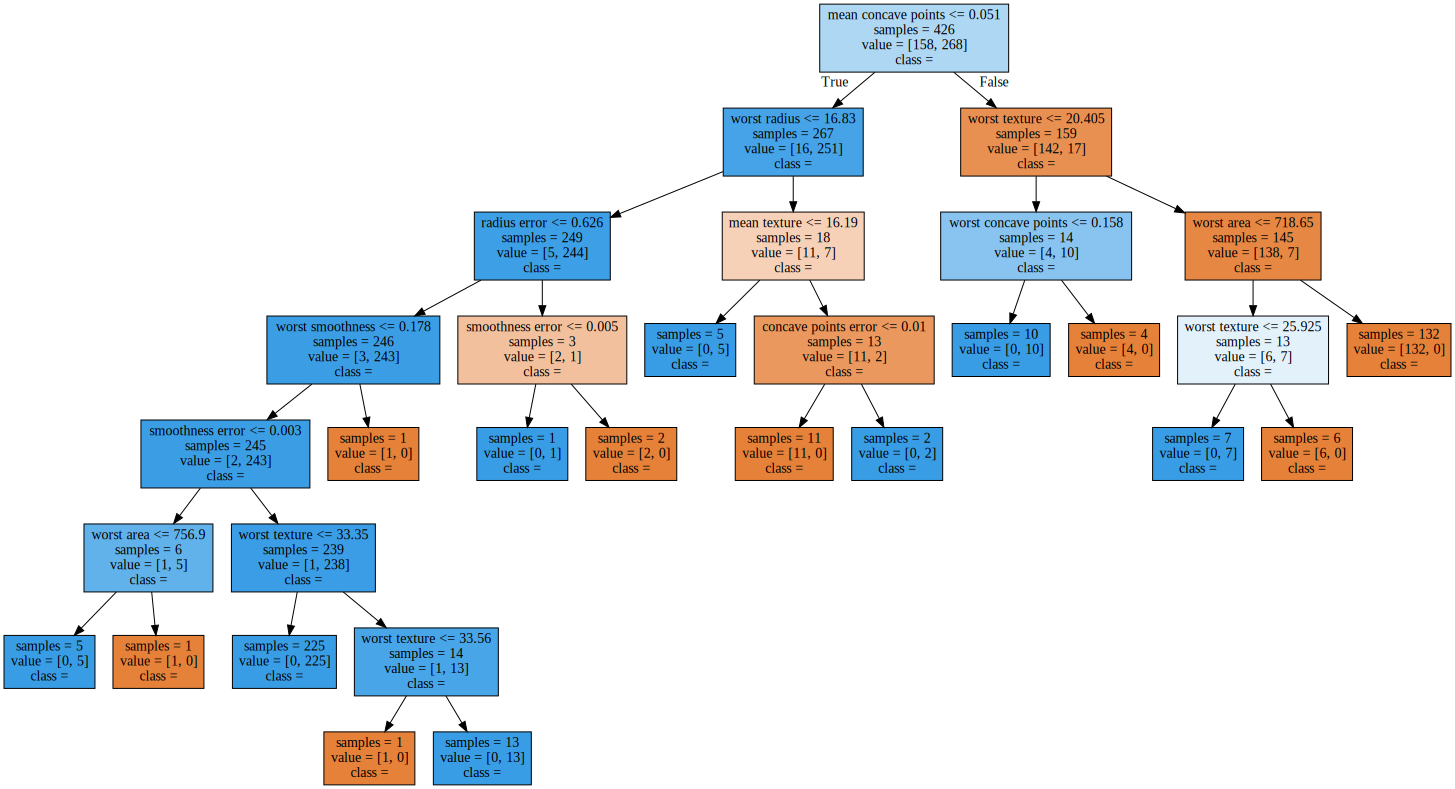

In [12]:
# 결정트리 출력하기
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

# 모델 생성 및 학습
tree = DecisionTreeClassifier().fit(X_train,y_train)

# export_graphviz를 통해 결정트리를 시각화 할 수 있다.
export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

# with  as f를 이용해 파일을 출력한다.
with open('tree.dot',encoding='UTF8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


########################

# export_graphviz 함수를 통해 파일을 생성하고 graphviz 함수를 사용해 트리모형을 시각화 할 수 있다.
# 각 노드의 분할 기준을 엔트로피 또는 지니게수를 이용해 결정한다.

특성 중요도 
 :  [0.34803621 0.65196379]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

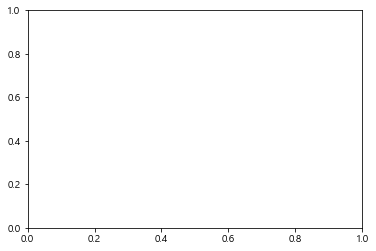

In [89]:
# 특성 중요도 확인하기
print('특성 중요도 \n : ',tree.feature_importances_)

# 특성 중요도 시각화하기
def plot_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center') # 가로막대를 그리는 함수
    plt.yticks(np.arange(n_features),cancer.feature_names) # y축에 이름 부여하기
    plt.xlabel('특성 중요도') # x축 제목 설정
    plt.ylabel('특성') # y축 제목 설정
    plt.ylim(-1,n_features) # y축 범위 설정

# 함수를 이용하여 시각화 하기
plot_importance(tree)

#######################
# 특성중요도를 시각화한 그래프를 통해 mean concave points들이 target에 가장 큰 영향을 주고 있다는 것을 알 수 있다.
# 특성 중요도를 파악해 불필요한 변수들을 없애 모델을 학습하는 방향으로 나갈수도 있지만 
# 중요도가 낮다고 해서 모델에 유용하지 않는것은 아니다.

Feature importances: [0. 1.]


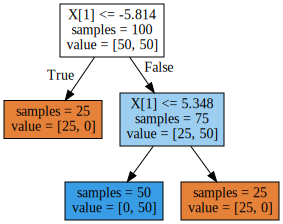

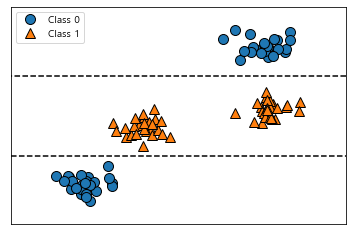

In [21]:
# mglearn에 저장되어 있는 시각화 그래프를 통해 특성과 클래스의 관계를 파악해보자
tree1 = mglearn.plots.plot_tree_not_monotone()
tree1

###################
# 첫번째 노드부터 시작하면, 샘플들이 총 100개가 있는데 조건에 의해 true와 false에 각각 25개, 75개씩 나누어서 가게 되었다.
# 두번째 노드(주황색)을 보면 25개중 25개를 0클래스로 구분하였기 때문에 샘플들을 정확히 분류했다고 보고 더이상 노드를 분할하지 않는다.
# 세번째 노드(하늘색)을 보면 0클래스로 25개 1클래스로 50개로 구분하였기 때문에 새로운 조건을 추가해 노드를 더 분할하게 된다.
# 마지막 리프노드들을 보면 각각의 클래스에 정확히 분류되게 되면서 더이상의 분할은 멈추게 된다.

* ram_price.csv 파일을 불러와서 모델 적용하기

In [31]:
import os
# 현재 디렉토리 파악
print(os.getcwd())

# 디렉토리 변경
os.chdir('C:/Users/174518/파이썬 파일저장소/기계학습 수업/data')

# 디렉토리 다시 확인
print(os.getcwd())

# 데이터 불러오기
ram_price =  pd.read_csv('ram_price.csv')

# 데이터 정보 확인
print('데이터 크기 :',ram_price.shape)
print('데이터 키 : ',ram_price.keys())


# 상위 10개 데이터 확인
ram_price.head(10)

########################

# 데이터를 확인해본 결과 시계열의 특성을 가지고 있는것을 확인할 수 있다.

C:\Users\174518\파이썬 파일저장소\기계학습 수업\data
C:\Users\174518\파이썬 파일저장소\기계학습 수업\data
데이터 크기 : (333, 3)
데이터 키 :  Index(['Unnamed: 0', 'date', 'price'], dtype='object')


,Unnamed: 0,date,price
0,0,1957.00,411041792.0
1,1,1959.00,67947725.0
2,2,1960.00,5242880.0
3,3,1965.00,2642412.0
4,4,1970.00,734003.0
5,5,1973.00,399360.0
6,6,1974.00,314573.0
7,7,1975.00,421888.0
8,8,1975.08,180224.0
9,9,1975.25,67584.0


Text(0, 0.5, '가격')

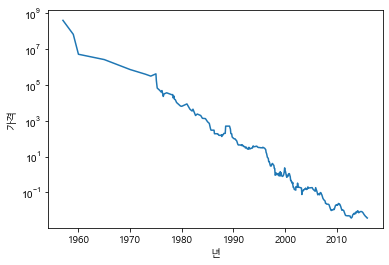

In [38]:
# 데이터 시각화 하기 

plt.yticks(fontname='Arial')  # y축에 눈금을 표시한다.
plt.semilogy(ram_price.date,ram_price.price) # 로그 스케일 변환을 해준다.
plt.xlabel('년')
plt.ylabel('가격')

train size : (202, 3) , test size : (131, 3)
결정트리의 예측값 :  [4.11041792e+08 6.79477250e+07 5.24288000e+06 2.64241200e+06]
선형회귀의 예측값 :  [1.54158963e+08 6.53907734e+07 4.25883016e+07 4.99067806e+06]


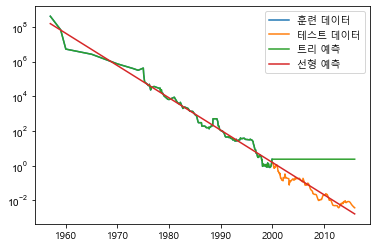

In [63]:
# 위의 데이터를 가지고 결정트리 회귀와 선형 회귀 모델을 비교 해보자

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전을 train 데이터로 2000년 이후를 test데이터로 나눈다.
# 시계열 데이터이기 때문에 무작위로 훈련 데이터와 테스트 데이터를 나눌 수 없다.
train = ram_price[ram_price['date']<2000]
test = ram_price[ram_price['date']>=2000]

# 데이터 크기 파악
print('train size : {} , test size : {}'.format(train.shape,test.shape))

# 날짜 특성만을 이용해 모델 학습하기
X_train = train.date[:,np.newaxis]  # np.newaxis는 차원을 늘려주는 역할을 한다.
y_train = np.log(train.price)  # price에 log변환을 취해준다.

# 모델 학습 및 생성
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear = LinearRegression().fit(X_train,y_train)

# 가격 전체에 대해 price를 예측한다.
X_all = ram_price.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_linear = linear.predict(X_all)

# 예측해서 나온값들은 로그변환이 취해져 있는 값들이기 때문에 원상태로 바꾸어준다.
price_tree = np.exp(pred_tree)
price_linear = np.exp(pred_linear)

print('결정트리의 예측값 : ',price_tree[:4]) # 일부만 출력
print('선형회귀의 예측값 : ',price_linear[:4])

# 위에서 만든 코드들을 시각화하기
plt.yticks(fontname = 'Arial')
plt.semilogy(train.date,train.price,label='훈련 데이터')
plt.semilogy(test.date,test.price,label='테스트 데이터')
plt.semilogy(ram_price.date,price_tree,label='트리 예측')
plt.semilogy(ram_price.date,price_linear,label='선형 예측')
plt.legend()

####################
# 결정트리의 경우는 시계열 데이터에서는 잘 맞지 않는다는 사실을 알 수 있다.
# 장기간을 예측하기는 힘들고 단기간의 증감을 예측할수는 있을 것 같다.
# 시계열 데이터에는 결정트리보단 회귀직선이 더 잘맞는다는 것을 알 수 있다.

* iris 데이터 가져와서 모델 적용하기

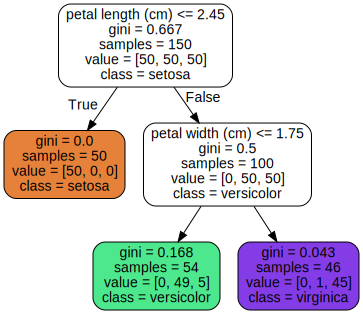

In [67]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 데이터 불러오기
iris = load_iris()

# 특성과 클래스 설정
X = iris.data[:,2:] # 꽃잎 길이와 너비
y = iris.target

# 모델 생성 및 학습
clf = DecisionTreeClassifier(max_depth=2,random_state=42)  # 최대 깊이를 2로 설정
clf.fit(X,y)

# 결정 트리 시각화 하기
export_graphviz(clf,out_file='iris.dot',feature_names=iris.feature_names[2:],
               class_names=iris.target_names, rounded = True, filled = True)
graphviz.Source.from_file('iris.dot')

#############################

# 각 클래스가 완벽히 분류되지는 않았지만 최대깊이를 2로 설정하였기 때문에 2번째 깊이에서 더이상 분할하지 않고 멈춘다.
# versicolor의 경우는 5개를 잘못 분류하였고, virginica의 경우는 1개를 잘못 분류하였다.

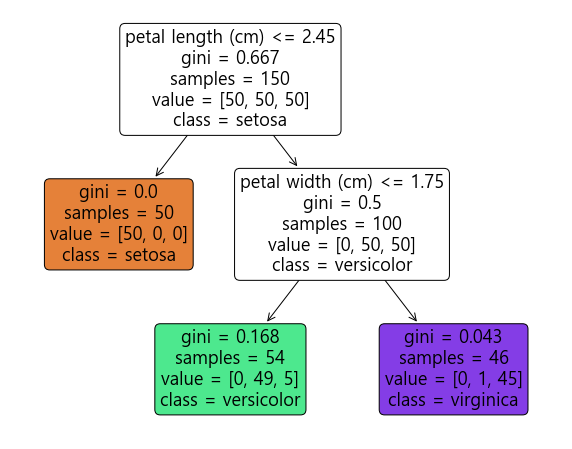

In [70]:
# 결정 트리를 시각화하는 또다른 방법
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8)) # 그래프 사이즈 조정
plot_tree(clf,filled=True,rounded=True,max_depth=2,
         feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.show()

# 랜덤 포레스트

* 랜덤 포레스트는 앙상블 모델에서 배깅의 일종이다.
* 앙상블 모델을 크게 배깅과 부스팅으로 나뉜다.
* 배깅의 경우는 샘플들을 bootstrap방법을 사용하여 추출하여 여러 모델을 종합하여 결과를 도출한다.
* 배깅은 편향이 작고 분산이 큰 모형에(과대적합) 적합하고 독립적이다.
* 부스팅은 앞단계에서 발생한 실수들을 계속해서 줄여나가는 방법이다.
* 부스팅은 연속적이다.

* 각각의 트리를 생성하는 방법은 2가지가 있다.
* 데이터 포인트들을 bootstrap방법으로 추출하여 트리를 생성하는 방법이 있다.
* 특성들을 무작위로 중복선택하게끔 만들어 트리를 생성하는 방법이 있다.

In [71]:
# 랜덤 포레스트 파라미터 알아보기
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

'''
bootstrap -> 무작위 반복 추출
criterion -> 분류 기준 --> 지니 또는 엔트로피
max_depth -> 최대깊이 설정 -> 가지치기
max_features -> 최대 특성 랜덤 중복 추출
max_leaf_nodes -> 리프 노드들의 최대 개수 설정
min_samples_leaf -> 리프노드가 되기 위해 필요한 최소한의 샘플 수
min_samples_split -> 노드를 분할하기 위해 필요한 최소한의 샘플 수
n_estimators -> 결정트리의 개수 설정
n_jobs -> cpu코어 개수 설정
random_state -> 시드값 설정
'''

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
# make_moons 데이터를 사용해 랜덤포레스트 적용해보기
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
X,y = make_moons(n_samples=100,noise= 0.25,random_state=42)

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 모델 생성 및 학습
forest = RandomForestClassifier(n_estimators=5,random_state=1) # 결정트리를 5개를 만들고 시드값을 1로 지정
forest.fit(X_train,y_train)

# 정확도 확인하기!!
print('훈련 정확도 : {:.3f}'.format(forest.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(forest.score(X_test,y_test)))

cv_5 = cross_val_score(forest,X_train,y_train,cv=5) # 교차검증을 실시하는데 5구간으로 나누어서 실시한다.
print('모델 평가 정확도 cv=5 : ',np.round(cv_5,3))
print('모델 평가 정확도 평균 cv=5 : ',np.round(cv_5,3).mean())

cv_10 = cross_val_score(forest,X_train,y_train,cv=10)
print('모델 평가 정확도 cv=10 : ',np.round(cv_10,3))
print('모델 평가 정확도 평균 cv=10 : ',np.round(cv_10,3).mean())

###########################

# 교차검증은 모델의 성능을 평가하고 매개변수를 조절하기 위해 사용한다.
# 교차검증을 실시할때에는 test 데이터들은 건들지 않고 train 데이터에서 또 다른 train과 validation 데이터를 생성해 
# 교차검증을 실시하게 된다. --> 교차검증의 결과가 괜찮게 나왔다면 그 결과에 해당되는 매개변수를 그대로 유지한채
# 훈련데이터 전부를 학습시킨후 test 데이터를 모델에 넣어 예측을 실시한다.

훈련 정확도 : 0.973
테스트 정확도 : 0.720
모델 평가 정확도 cv=5 :  [0.812 0.75  1.    0.857 0.786]
모델 평가 정확도 평균 cv=5 :  0.841
모델 평가 정확도 cv=10 :  [0.75  0.75  0.875 1.    1.    0.875 0.875 1.    0.667 0.833]
모델 평가 정확도 평균 cv=10 :  0.8625


In [83]:
# 결정트리를 이용해 결과 확인해보기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 데이터 생성
X,y = make_moons(n_samples=100,noise=0.25,random_state=42)

# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 모델 생성 및 학습
tree = DecisionTreeClassifier(max_depth=None,min_samples_split=2,random_state=1) # 노드를 분할하기 위한 샘플의 최소 개수를 2로 지정
tree.fit(X_train,y_train)

# 정확도 확인하기
print('훈련 정확도 : {:.3f}'.format(tree.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(tree.score(X_test,y_test)))

cv_5 = cross_val_score(tree,X_train,y_train,cv=5) # 교차검증을 실시하는데 5구간으로 나누어서 실시한다.
print('모델 평가 정확도 cv=5 : ',np.round(cv_5,3))
print('모델 평가 정확도 평균 cv=5 : ',np.round(cv_5,3).mean())

cv_10 = cross_val_score(tree,X_train,y_train,cv=10)
print('모델 평가 정확도 cv=10 : ',np.round(cv_10,3))
print('모델 평가 정확도 평균 cv=10 : ',np.round(cv_10,3).mean())

#########################
# 결정트리의 경우 과대적합될 가능성이 높기 때문에 이를 방지하기 위해 랜덤포레스트 모델을 사용한다.

훈련 정확도 : 1.000
테스트 정확도 : 0.880
모델 평가 정확도 cv=5 :  [0.812 0.688 1.    0.929 0.786]
모델 평가 정확도 평균 cv=5 :  0.843
모델 평가 정확도 cv=10 :  [0.75  0.875 0.75  0.875 1.    0.875 0.875 1.    0.5   0.833]
모델 평가 정확도 평균 cv=10 :  0.8333


* cancer 데이터를 가지고 random forest 모델 적용하기

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

# 모델 생성 및 학습
forest = RandomForestClassifier(n_estimators=100,random_state=0) # 결정트리 100개 생성
forest.fit(X_train,y_train)

# 정확도 확인
print('훈련 정확도 : {:.3f}'.format(forest.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(forest.score(X_test,y_test)))

cv_10 = cross_val_score(forest,X_train,y_train,cv=10)
print('모델 평가 정확도 cv=10 : ',np.round(cv_10,3))
print('모델 평가 정확도 평균 cv=10 : ',np.round(cv_10.mean(),3))

#############################
# 랜덤포레스트는 일반적인 결정트리나 선형모델보다 더 좋은 성능을 가진다.
# 원칙적으로는 test데이터는 아예 건들지 않고 train 데이터만을 가지고 모델을 훈련시키기고 모델을 평가하고
# 파라미터를 설정한뒤 이 모델이 가장 성능이 좋다고 생각한다면 그때 test 데이터를 활용하여야 한다.

훈련 정확도 : 1.000
테스트 정확도 : 0.972
모델 평가 정확도 cv=10 :  [0.953 0.953 0.93  0.953 0.884 0.977 0.953 0.929 0.976 0.976]
모델 평가 정확도 평균 cv=10 :  0.949


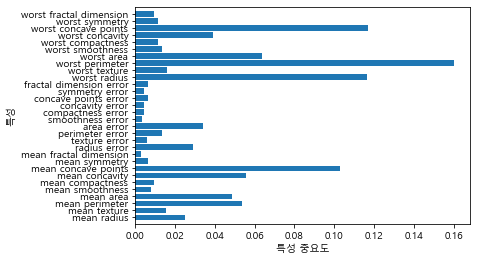

In [92]:
# 특성의 중요도 확인

# 특성 중요도 시각화하기
def plot_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center') # 가로막대를 그리는 함수
    plt.yticks(np.arange(n_features),cancer.feature_names) # y축에 이름 부여하기
    plt.xlabel('특성 중요도') # x축 제목 설정
    plt.ylabel('특성') # y축 제목 설정
    plt.ylim(-1,n_features) # y축 범위 설정

plot_importance(forest)

################################
# 특성의 중요도를 시각화하여 어떤 특성이 모델에 많은 영향을 미치는지 확인할 수 있다.
# 특성들이 너무 많다면 중요도를 확인해 영향이 낮은 특성들을 제거해 새로운 모델에 학습시킬 수 있다.

In [ ]:
# 랜덤포레스트의 경우 스케일링 작업을 따로 할 필요가 없다.
# 결정트리는 분류가 어떻게 이루어지는지 확인할 수 있지만, 랜덤포레스트는 블랙박스 모델이라 확인하기가 힘들다.
# 차원이 크거나 희소한 데이터에 대해서는 성능이 좋지 않다.
# 데이터 양이 많아지면 모델의 학습 속도가 느려지게 된다.